# Intro to Jupyter Notebook

The information included here follows these webpages: https://realpython.com/jupyter-notebook-introduction/, https://medium.com/ibm-data-science-experience/back-to-basics-jupyter-notebooks-dfcdc19c54bc

## About this Notebook

### Requirements
- Direct access to the input data
- Jupyter notebook installed on that platform
- Python packages:
    - Matplotlib
    - mpl_toolkits
    - NetCDF4
    - Numpy
    
    

### Modes
- The cells are either Python 3 code (next cell), or Markdown (this cell). 
- Modes can be in either of two modes:
    - `EDIT`, which appears green
    - `COMMAND`, which appears blue
- To enter enter `EDIT` mode, hit `Enter` or double click
- To enter `COMMAND` mode, hit `Esc` or click anywhere outside the box

### Navigation
The menus at the top of the page allow you to control the cells, run them, and manage the file. 

### Keyboard commands
Many of the above navigation menus have keyboard shortcuts:

- Command Mode: ESC
- Edit Mode: ENTER
- Run selected cell: CTRL+ENTER
- Run cell and insert below: ALT+ENTER
- Run cell and select below: SHIFT+ENTER

From COMMAND mode:
- Insert cell above: A
- Insert cell below: B
- Cut selected cells: X
- Copy selected cells: C
- Delete selected cell : d+d

## Run the notebook

To run the whole notebook, use the menu: `Kernel > Restart & Run All`, or click the "Fast forward" button on the top menu bar.

To run (or rerun) a single cell, click on the cell and press `Shift, Enter`, or click the "Run" button on the top menu bar.
    

In [1]:
import os

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pygrib
from datetime import datetime, timedelta
from netCDF4 import Dataset
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Set up the input files on Hera

Abstractions to change date and location were made, but assuming the final directory structure would remain the same.

In [2]:
# Times
bkg_date = '2023061011'
valid_date = '2023061012'

# Increment files
inc_loc = '/work/noaa/wrfruc/span/jedi_summer_retro/gsi_prepbufr_analysis/' + valid_date + '_singleobs/anal_inc'
inc_dynam_nc = os.path.join(inc_loc, 'fv3_dynvars_incr')
#inc_tracer_nc = os.path.join(inc_loc, 'fv3_tracer')

# Load files into NetCDF Datasets
#inc_dynam = Dataset(inc_dynam_nc, 'r')
#inc_tracer = Dataset(inc_tracer_nc, 'r')

In [3]:
# Access the data in a variable
#T = inc_dynam['T'][::]
#np.amin(T)

In [4]:
def get_color_level(values, ncolors):
    maxval = np.amax(values)
    minval = np.amin(values)
    color_levels = np.linspace(minval, maxval, num=(ncolors))

    return color_levels

In [5]:
def variable_plot(lons, lats, values, ncolors, colormap="terrain"):
    fig = plt.figure(figsize=(20, 16))
    
    m = Basemap(width = 6000000, height = 3500000, \
                rsphere = (6378137.00, 6356752.3142), \
                resolution = 'h', area_thresh = 1000.0, projection='lcc', \
                lat_1=38.5,lat_2=38.5,lat_0=38.5,lon_0=-97.5)
    
    x, y = m(lons, lats)
    
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    m.drawparallels(range(25, 60, 5),
                    linewidth=1.5,
                    labels=[1,0,0,0],
                    color='r')
    m.drawmeridians(range(-132, -57, 5),
                    linewidth=1.5,
                    labels=[0,0,0,1],
                    color='r')
    
    color_levels = get_color_level(values, ncolors)
    
    contour = m.contourf(x, y, values,
                         levels=color_levels,
                         extend='both',
                         cmap=colormap,
                         zorder=1)
    
    # Create colorbar at the bottom
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("bottom", size="2%", pad=0.4)
    cbar = plt.colorbar(contour, cax=cax, orientation='horizontal')
    cbar.set_label('Terrain (m)')

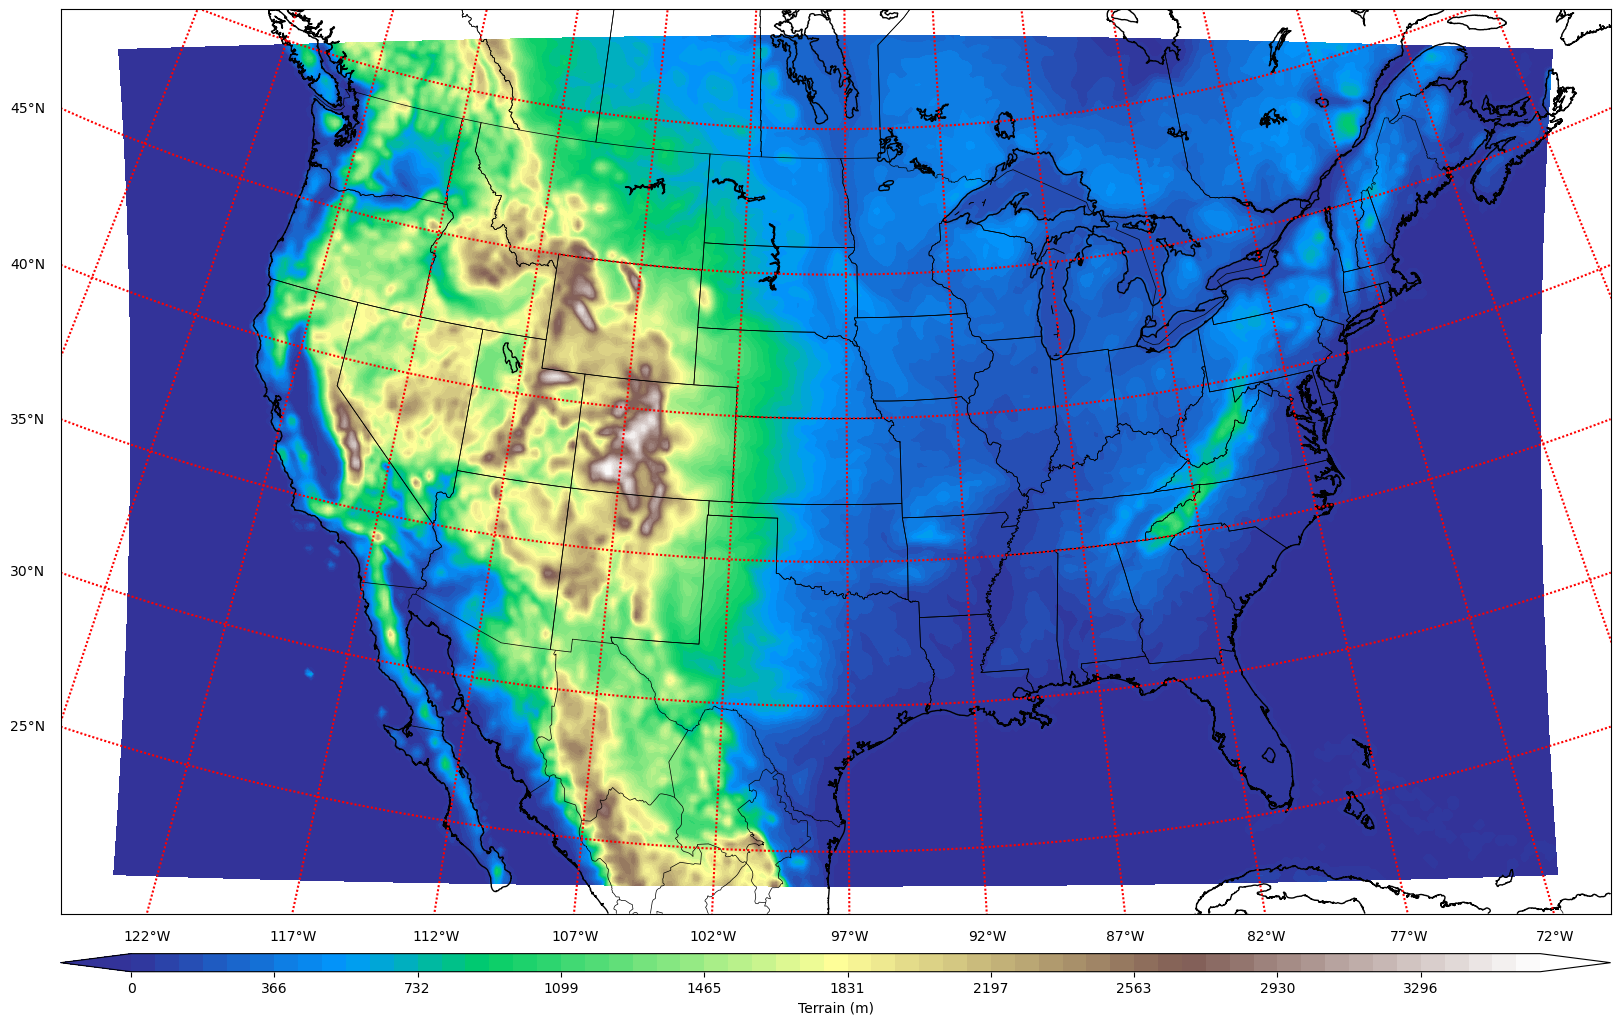

In [6]:
gridfile_loc = "/work/noaa/wrfruc/span/jedi_summer_retro/gsi_prepbufr_analysis/2023061012/anal_conv_dbz_gsi/fv3_grid_spec"
dynmfile_loc = "/work/noaa/wrfruc/span/jedi_summer_retro/nwges/2023061011/fcst_fv3lam/RESTART/20230610.120000.fv_core.res.tile1.nc"
grid = Dataset(gridfile_loc, 'r')
dynm = Dataset(dynmfile_loc, 'r')

lon = grid['grid_lont'][::]
lat = grid['grid_latt'][::]
terrain = dynm['phis'][0, :, :] / 9.81

variable_plot(lon, lat, terrain, 60, "terrain")